<a href="https://colab.research.google.com/github/arunmadapathi-1609/Deep-Learning-using-the-python.ipynb/blob/main/Fashion%20mnsit%20model%20using%20the%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#set seeds fpr reproduclitiy
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [26]:
# importing the depeendices
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [27]:
# data curation
#load and prepare the fashion mnsit dataset
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [28]:
# data processing
type(train_images)

numpy.ndarray

In [29]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [30]:
print(train_images[0].shape)

(28, 28)


In [31]:
print(len(train_images))

60000


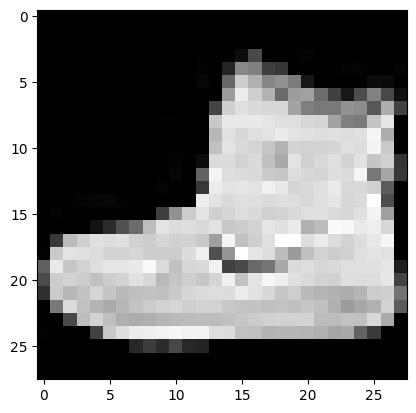

In [32]:
#displaying an image from the datasets
plt.imshow(train_images[0] , cmap='gray')
plt.show()

In [33]:
print(train_labels[0])

9


In [34]:
# the classes are the =['t-shirt/top','trouser','pulllover','dress','coat','sandal','shirt','sneaker','bag','ankle boat']
# normalize the pixels value to show between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

In [35]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [36]:
#reshape images to specify that its as grayscale image
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [37]:
train_images.shape

(60000, 28, 28, 1)

In [38]:
test_images.shape

(10000, 28, 28, 1)

In [39]:
 #convolutional neural network
# build the convolutional base
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [40]:
# compile and the train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [41]:
# model training
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7477 - loss: 0.6955 - val_accuracy: 0.8715 - val_loss: 0.3637
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8789 - loss: 0.3353 - val_accuracy: 0.8876 - val_loss: 0.3178
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8976 - loss: 0.2828 - val_accuracy: 0.8938 - val_loss: 0.2930
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9085 - loss: 0.2479 - val_accuracy: 0.8956 - val_loss: 0.2853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9175 - loss: 0.2197 - val_accuracy: 0.8989 - val_loss: 0.2807


In [44]:
# evaluating the model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2) # The re.VERBOSE flag in Python's re module allows you to write more readable regular expressions by the Ignoring whitespace in the pattern and  Allowing comments within the regex.
print('\nTest accuracy :' , test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8989 - loss: 0.2807

Test accuracy : 0.8988999724388123


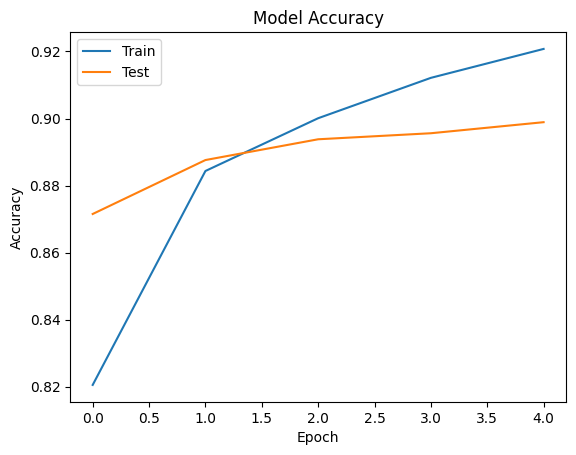

In [46]:
# plotting the training and validation accuracy values
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test']  ,loc='upper left')
plt.show()

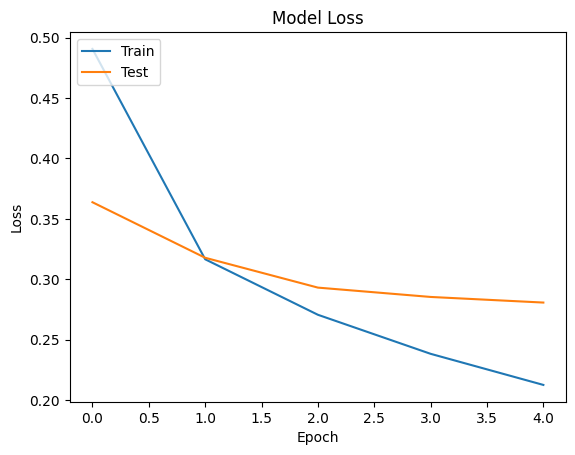

In [48]:
# plottting the training and validiation loss values
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test']  ,loc='upper left')
plt.show()

In [49]:
model.save('trained_fashion_mnsit_model.h5')